In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contraceptive/contraceptive prevalence any method married women age 15-49.csv
/kaggle/input/contraceptive/contraceptive any method all women 15-49.csv
/kaggle/input/contraceptive/contraceptive prevalence any method unmarried women age 15-49 .csv


**Analyzing Global Contraceptive Prevalence: Trends, Disparities, and Socioeconomic Impacts**

**Research Objectives**

To analyze trends in contraceptive prevalence across different groups (all women, married women, and sexually active unmarried women).

To compare contraceptive prevalence across regions and income levels.

To assess how socioeconomic factors (e.g., education, income, healthcare access) influence contraceptive use.

To evaluate disparities in contraceptive access between married and unmarried women.


**Research Questions**

How has contraceptive prevalence changed globally over the years for different population groups?

What are the regional disparities in contraceptive use among married and unmarried women?

How does contraceptive prevalence correlate with fertility rate, education, and GDP per capita?

What factors contribute to lower contraceptive prevalence among certain groups?


**Data downloaded from World Bank Group**

Women data is for all (regardless of married or unmarried status)

married data is for married ladies and unmarried is for sexually active unmarried women

In [198]:
#Load  data
import pandas as pd

women = pd.read_csv("/kaggle/input/contraceptive/contraceptive any method all women 15-49.csv")
married = pd.read_csv("/kaggle/input/contraceptive/contraceptive prevalence any method married women age 15-49.csv")
unmarried = pd.read_csv("/kaggle/input/contraceptive/contraceptive prevalence any method unmarried women age 15-49 .csv")

In [199]:
women.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Contraceptive prevalence, any method (% of all...",SP.DYN.CONU.AL.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,"Contraceptive prevalence, any method (% of all...",SP.DYN.CONU.AL.ZS,Africa Eastern and Southern,AFE,..,..,..,..,..,..,...,..,..,..,..,34.5437689482571,..,..,..,..,..
2,"Contraceptive prevalence, any method (% of all...",SP.DYN.CONU.AL.ZS,Africa Western and Central,AFW,..,..,..,..,..,..,...,..,..,..,..,17.3750237165794,..,..,..,..,..
3,"Contraceptive prevalence, any method (% of all...",SP.DYN.CONU.AL.ZS,Albania,ALB,..,..,..,..,..,..,...,..,..,..,..,33.2,..,..,..,..,..
4,"Contraceptive prevalence, any method (% of all...",SP.DYN.CONU.AL.ZS,Algeria,DZA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [200]:
married.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Contraceptive prevalence, any method (% of mar...",SP.DYN.CONU.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,22.5,22.5,..,..,..,..,..,..,..
1,"Contraceptive prevalence, any method (% of mar...",SP.DYN.CONU.ZS,Africa Eastern and Southern,AFE,..,..,..,..,..,..,...,..,..,..,..,..,42.3600499131128,..,..,..,..
2,"Contraceptive prevalence, any method (% of mar...",SP.DYN.CONU.ZS,Africa Western and Central,AFW,..,..,..,..,..,..,...,..,..,..,..,..,19.1597537149594,..,..,..,..
3,"Contraceptive prevalence, any method (% of mar...",SP.DYN.CONU.ZS,Albania,ALB,..,..,..,..,..,..,...,..,..,..,..,46,..,..,..,..,..
4,"Contraceptive prevalence, any method (% of mar...",SP.DYN.CONU.ZS,Algeria,DZA,..,..,..,..,..,..,...,..,..,..,..,..,53.6,..,..,..,..


In [201]:
unmarried.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Contraceptive prevalence, any method (% of sex...",SP.DYN.CONU.SA.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,"Contraceptive prevalence, any method (% of sex...",SP.DYN.CONU.SA.ZS,Africa Eastern and Southern,AFE,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,"Contraceptive prevalence, any method (% of sex...",SP.DYN.CONU.SA.ZS,Africa Western and Central,AFW,..,..,..,..,..,..,...,..,..,..,..,37.078655528028,..,..,..,..,..
3,"Contraceptive prevalence, any method (% of sex...",SP.DYN.CONU.SA.ZS,Albania,ALB,..,..,..,..,..,..,...,..,..,..,..,60.5,..,..,..,..,..
4,"Contraceptive prevalence, any method (% of sex...",SP.DYN.CONU.SA.ZS,Algeria,DZA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [202]:
print(women.columns.tolist())  


['Series Name', 'Series Code', 'Country Name', 'Country Code', '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]', '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]', '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]', '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]', '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]', '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]', '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2

In [203]:
#Strip Any Extra Spaces from Column Names

women.columns = women.columns.str.strip()
married.columns = women.columns.str.strip()
unmarried.columns = unmarried.columns.str.strip()


In [204]:
# Keep only relevant columns
columns_to_drop = ["Series Name", "Series Code", "Country Code"]  

women = women.drop(columns=[col for col in columns_to_drop if col in women.columns])
married = married.drop(columns=[col for col in columns_to_drop if col in married.columns])
unmarried = unmarried.drop(columns=[col for col in columns_to_drop if col in unmarried.columns])


In [205]:
#check if the drop was successful
print(women.columns.tolist())  
print(married.columns.tolist())  
print(unmarried.columns.tolist())  


['Country Name', '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]', '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]', '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]', '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]', '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]', '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]', '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]

****

Now that the columns are cleaned, let's reshape your datasets from a wide format (where each year is a separate column) to a long format (where each row represents a country, year, and contraceptive prevalence).



In [206]:
# Remove any extra spaces from column names
women.columns = women.columns.str.strip()
married.columns = married.columns.str.strip()
unmarried.columns = unmarried.columns.str.strip()


In [207]:
# Rename columns to standardize country column name if necessary
women.rename(columns={'Country Name': 'Country'}, inplace=True)
married.rename(columns={'Country Name': 'Country'}, inplace=True)
unmarried.rename(columns={'Country Name': 'Country'}, inplace=True)


In [209]:
women.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Africa Eastern and Southern,..,..,..,..,..,..,..,..,..,...,..,..,..,..,34.5437689482571,..,..,..,..,..
2,Africa Western and Central,..,..,..,..,..,..,..,..,..,...,..,..,..,..,17.3750237165794,..,..,..,..,..
3,Albania,..,..,..,..,..,..,..,..,..,...,..,..,..,..,33.2,..,..,..,..,..
4,Algeria,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [208]:


# Rename year columns (Remove "[YR]" for consistency)
women.columns = [col.replace("[YR]", "") if "[YR]" in col else col for col in women.columns]

# Convert year column names to integers (excluding metadata columns)
women.columns = [int(col) if col.isdigit() else col for col in women.columns]

# Drop duplicate column names
women.columns = pd.Series(women.columns).str.split().str[0]

# Check new column names
print(women.columns)


Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


In [210]:


# Rename year columns (Remove "[YR]" for consistency)
married.columns = [col.replace("[YR]", "") if "[YR]" in col else col for col in married.columns]

# Convert year column names to integers (excluding metadata columns)
married.columns = [int(col) if col.isdigit() else col for col in married.columns]

# Drop duplicate column names
married.columns = pd.Series(married.columns).str.split().str[0]

# Check new column names
print(married.columns)


Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


In [211]:


# Rename year columns (Remove "[YR]" for consistency)
unmarried.columns = [col.replace("[YR]", "") if "[YR]" in col else col for col in unmarried.columns]

# Convert year column names to integers (excluding metadata columns)
unmarried.columns = [int(col) if col.isdigit() else col for col in unmarried.columns]

# Drop duplicate column names
unmarried.columns = pd.Series(unmarried.columns).str.split().str[0]

# Check new column names
print(unmarried.columns)


Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


Convert Data to Numeric & Handle Missing Values

Ensure year data is numeric
Convert NaN values to suitable estimates using interpolation & forward/backward fill


In [212]:
# Ensure year columns are numeric
year_columns = [col for col in women.columns if isinstance(col, int)]
women[year_columns] = women[year_columns].apply(pd.to_numeric, errors='coerce')

# Ensure year columns are numeric
married_columns = [col for col in married.columns if isinstance(col, int)]
married[year_columns] = married[year_columns].apply(pd.to_numeric, errors='coerce')

# Ensure year columns are numeric
year_columns = [col for col in unmarried.columns if isinstance(col, int)]
unmarried[year_columns] = unmarried[year_columns].apply(pd.to_numeric, errors='coerce')

unmarried.head()



,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Africa Eastern and Southern,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Africa Western and Central,..,..,..,..,..,..,..,..,..,...,..,..,..,..,37.078655528028,..,..,..,..,..
3,Albania,..,..,..,..,..,..,..,..,..,...,..,..,..,..,60.5,..,..,..,..,..
4,Algeria,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Convert wide format data to long format

In [213]:
# Convert to long format if needed
women = women.melt(id_vars=['Country'], 
                  var_name='year', value_name='value')

# Convert 'year' column to integer
women['year'] = women['year'].astype(int)

# Check transformed data
print(women.head())


                       Country  year value
0                  Afghanistan  1960    ..
1  Africa Eastern and Southern  1960    ..
2   Africa Western and Central  1960    ..
3                      Albania  1960    ..
4                      Algeria  1960    ..


In [216]:
#convert to long format if needed
married = married.melt(id_vars=['Country'], 
                  var_name='year', value_name='value')

# Convert 'year' column to integer
married['year'] = married['year'].astype(int)

# Check transformed data
print(married.head())


                       Country  year value
0                  Afghanistan  1960    ..
1  Africa Eastern and Southern  1960    ..
2   Africa Western and Central  1960    ..
3                      Albania  1960    ..
4                      Algeria  1960    ..


In [224]:
women['value'] = pd.to_numeric(women['value'], errors='coerce')


In [226]:
# Find Afghanistan's value in the 2023 dataset
afghanistan_value = women[women['Country'] == 'Afghanistan']
print(afghanistan_value[['Country', 'value']])


           Country  value
0      Afghanistan    NaN
271    Afghanistan    NaN
542    Afghanistan    NaN
813    Afghanistan    NaN
1084   Afghanistan    NaN
...            ...    ...
15989  Afghanistan    NaN
16260  Afghanistan    NaN
16531  Afghanistan    NaN
16802  Afghanistan    NaN
17073  Afghanistan    NaN

[64 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [225]:
print("\nTop 10 Lowest - women")
print(women.nsmallest(10,'value')[["Country","value"]])


Top 10 Lowest - women
            Country  value
8883   Sierra Leone    2.6
8768         Guinea    2.7
10100      Ethiopia    2.7
10070          Chad    3.9
8849          Niger    4.4
7469           Mali    4.6
13593          Chad    4.6
11266    Mauritania    4.8
14948          Chad    5.4
8108         Uganda    5.5


In [219]:
#convert to long format if needed
unmarried = unmarried.melt(id_vars=[ 'Country'], 
                  var_name='year', value_name='value')

# Convert 'year' column to integer
unmarried['year'] = unmarried['year'].astype(int)

# Check transformed data
print(unmarried.head())


                       Country  year value
0                  Afghanistan  1960    ..
1  Africa Eastern and Southern  1960    ..
2   Africa Western and Central  1960    ..
3                      Albania  1960    ..
4                      Algeria  1960    ..


Impute missing values using KNN Method

In [141]:
import pandas as pd
from sklearn.impute import KNNImputer


# Step 1: Convert the 'value' column to numeric, forcing errors to NaN
women['value'] = pd.to_numeric(women['value'], errors='coerce')

# Step 2: Check if there are any non-numeric values (NaN values will be created for invalid entries)
print(f"Number of NaN values in 'value' column before imputation: {women['value'].isnull().sum()}")

# Step 3: Initialize the KNN imputer (you can adjust n_neighbors as needed)
knn_imputer = KNNImputer(n_neighbors=5)

# Step 4: Apply KNN imputation only to the 'value' column
women_values = women[['value']]  # Only the 'value' column for imputation

# Step 5: Impute the missing values
imputed_values = knn_imputer.fit_transform(women_values)

# Step 6: Update the original 'value' column in the DataFrame with the imputed values
women['value'] = imputed_values

# Check if missing values have been imputed
print(f"Number of NaN values in 'value' column after imputation: {women['value'].isnull().sum()}")

# Step 7: Save the imputed dataset
women.to_csv("dataset_imputed_knn.csv", index=False)
print("KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn.csv'.")


Number of NaN values in 'value' column before imputation: 16604
Number of NaN values in 'value' column after imputation: 0
KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn.csv'.


Explanation of Key Steps:

Convert value Column to Numeric:

We use pd.to_numeric() with errors='coerce' to convert any non-numeric entries in the value column to NaN. This ensures that only valid numeric values are passed to the KNN imputer.

Non-numeric values (like strings or invalid numbers) will become NaN, which can be imputed.

Check for NaN values:

Before and after imputation, the number of NaN values is printed so you can see if there are any issues with the imputation process.

KNN Imputation:

After cleaning the value column, we apply KNN imputation to fill in missing values.



In [142]:
import pandas as pd
from sklearn.impute import KNNImputer

# Step 1: Convert the 'value' column to numeric, forcing errors to NaN
married['value'] = pd.to_numeric(married['value'], errors='coerce')

# Step 2: Check if there are any non-numeric values (NaN values will be created for invalid entries)
print(f"Number of NaN values in 'value' column before imputation: {married['value'].isnull().sum()}")

# Step 3: Initialize the KNN imputer (you can adjust n_neighbors as needed)
knn_imputer = KNNImputer(n_neighbors=5)

# Step 4: Apply KNN imputation only to the 'value' column
married_values = married[['value']]  # Only the 'value' column for imputation

# Step 5: Impute the missing values
imputed_values = knn_imputer.fit_transform(married_values)

# Step 6: Update the original 'value' column in the DataFrame with the imputed values
married['value'] = imputed_values

# Check if missing values have been imputed
print(f"Number of NaN values in 'value' column after imputation: {married['value'].isnull().sum()}")

# Step 7: Save the imputed dataset
married.to_csv("dataset_imputed_knn1.csv", index=False)
print("KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn1.csv'.")


Number of NaN values in 'value' column before imputation: 16129
Number of NaN values in 'value' column after imputation: 0
KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn1.csv'.


In [143]:
import pandas as pd
from sklearn.impute import KNNImputer


# Step 1: Convert the 'value' column to numeric, forcing errors to NaN
unmarried['value'] = pd.to_numeric(unmarried['value'], errors='coerce')

# Step 2: Check if there are any non-numeric values (NaN values will be created for invalid entries)
print(f"Number of NaN values in 'value' column before imputation: {unmarried['value'].isnull().sum()}")

# Step 3: Initialize the KNN imputer (you can adjust n_neighbors as needed)
knn_imputer = KNNImputer(n_neighbors=5)

# Step 4: Apply KNN imputation only to the 'value' column
unmarried_values = unmarried[['value']]  # Only the 'value' column for imputation

# Step 5: Impute the missing values
imputed_values = knn_imputer.fit_transform(unmarried_values)

# Step 6: Update the original 'value' column in the DataFrame with the imputed values
unmarried['value'] = imputed_values

# Check if missing values have been imputed
print(f"Number of NaN values in 'value' column after imputation: {unmarried['value'].isnull().sum()}")

# Step 7: Save the imputed dataset
unmarried.to_csv("dataset_imputed_knn2.csv", index=False)
print("KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn2.csv'.")


Number of NaN values in 'value' column before imputation: 17117
Number of NaN values in 'value' column after imputation: 0
KNN imputation complete. Imputed dataset saved as 'dataset_imputed_knn2.csv'.


In [144]:
# Country to continent mapping dictionary
import pandas as pd

allwomen_new=pd.read_csv("/kaggle/working/dataset_imputed_knn.csv")
married_new = pd.read_csv("/kaggle/working/dataset_imputed_knn1.csv")
unmarried_new = pd.read_csv("/kaggle/working/dataset_imputed_knn2.csv")

country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Australia",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Africa Eastern and Southern": "Africa",
    "Africa Western and Central": "Africa",
    "Bahamas":"North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cabo Verde": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo (Congo-Brazzaville)": "Africa",
    "Congo (Democratic Republic of the Congo)": "Africa",
    "Costa Rica": "North America",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czechia (Czech Republic)": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Fiji": "Australia",
    "Finland": "Europe",
    "France": "Europe",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Australia",
    "Korea (North)": "Asia",
    "Korea (South)": "Asia",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Australia",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Australia",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (formerly Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Australia",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Australia",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Macedonia (formerly Macedonia)": "Europe",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Australia",
    "Panama": "North America",
    "Papua New Guinea": "Australia",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe/Asia",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Australia",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Australia",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor-Leste (East Timor)": "Asia",
    "Togo": "Africa",
    "Tonga": "Australia",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Tuvalu": "Australia",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Australia",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa"
}

# Step 2: Apply this mapping to your DataFrame
allwomen_new['Continent'] = allwomen_new['Country'].map(country_to_continent)
married_new["Continent"]= married_new["Country"].map(country_to_continent)
unmarried_new["Continent"]= unmarried_new["Country"].map(country_to_continent)

# Check the result
print(allwomen_new.head())
print(married_new.head())
print(unmarried_new.head())


                       Country  year     value Continent
0                  Afghanistan  1960  36.59596      Asia
1  Africa Eastern and Southern  1960  36.59596    Africa
2   Africa Western and Central  1960  36.59596    Africa
3                      Albania  1960  36.59596    Europe
4                      Algeria  1960  36.59596    Africa
                       Country  year     value Continent
0                  Afghanistan  1960  46.60327      Asia
1  Africa Eastern and Southern  1960  46.60327    Africa
2   Africa Western and Central  1960  46.60327    Africa
3                      Albania  1960  46.60327    Europe
4                      Algeria  1960  46.60327    Africa
                       Country  year      value Continent
0                  Afghanistan  1960  48.261611      Asia
1  Africa Eastern and Southern  1960  48.261611    Africa
2   Africa Western and Central  1960  48.261611    Africa
3                      Albania  1960  48.261611    Europe
4                      Alg

In [145]:
# Step 3: Group data by continent and calculate summary statistics (mean, median, etc.)
allwomen_new_grouped_by_continent = allwomen_new.groupby('Continent')['value'].mean()  # Change 'value' to whatever your column is
print(allwomen_new_grouped_by_continent)

# You can also group by multiple columns, such as both 'Country' and 'Continent', if needed
allwomen_new_grouped_by_continent_country = allwomen_new.groupby(['Continent', 'Country'])['value'].mean()
print(allwomen_new_grouped_by_continent_country)


Continent
Africa           35.409151
Asia             36.566320
Australia        36.504654
Europe           37.638155
North America    37.109081
South America    37.639135
Name: value, dtype: float64
Continent      Country                    
Africa         Africa Eastern and Southern    36.180882
               Africa Western and Central     35.223032
               Algeria                        36.595960
               Angola                         35.538337
               Benin                          34.677589
                                                ...    
South America  Guyana                         35.991525
               Paraguay                       37.418277
               Peru                           39.681597
               Suriname                       36.502526
               Uruguay                        37.224148
Name: value, Length: 168, dtype: float64


In [146]:
# Step 3: Group data by continent and calculate summary statistics (mean, median, etc.)
married_new_grouped_by_continent = married_new.groupby('Continent')['value'].mean()  # Change 'value' to whatever your column is
print(married_new_grouped_by_continent)

# You can also group by multiple columns, such as both 'Country' and 'Continent', if needed
married_new_grouped_by_continent_country = married_new.groupby(['Continent', 'Country'])['value'].mean()
print(married_new_grouped_by_continent_country)


Continent
Africa           44.539872
Asia             46.613720
Australia        46.385964
Europe           47.834184
North America    47.704220
South America    48.114679
Name: value, dtype: float64
Continent      Country                    
Africa         Africa Eastern and Southern    45.510162
               Africa Western and Central     44.634328
               Algeria                        47.598174
               Angola                         44.442128
               Benin                          43.145100
                                                ...    
South America  Guyana                         45.154424
               Paraguay                       47.835623
               Peru                           53.305271
               Suriname                       46.415565
               Uruguay                        47.646918
Name: value, Length: 168, dtype: float64


In [147]:
# Step 3: Group data by continent and calculate summary statistics (mean, median, etc.)
unmarried_new_grouped_by_continent = unmarried_new.groupby('Continent')['value'].mean()  # Change 'value' to whatever your column is
print(unmarried_new_grouped_by_continent)

# You can also group by multiple columns, such as both 'Country' and 'Continent', if needed
unmarried_new_grouped_by_continent_country = unmarried_new.groupby(['Continent', 'Country'])['value'].mean()
print(unmarried_new_grouped_by_continent_country)


Continent
Africa           48.052317
Asia             48.198291
Australia        48.225480
Europe           48.298273
North America    48.356897
South America    49.125759
Name: value, dtype: float64
Continent      Country                    
Africa         Africa Eastern and Southern    48.261611
               Africa Western and Central     48.180174
               Algeria                        48.261611
               Angola                         47.945024
               Benin                          47.733360
                                                ...    
South America  Guyana                         48.501274
               Paraguay                       48.112211
               Peru                           52.985760
               Suriname                       48.261611
               Uruguay                        48.261611
Name: value, Length: 168, dtype: float64


Visualizing grouoed data

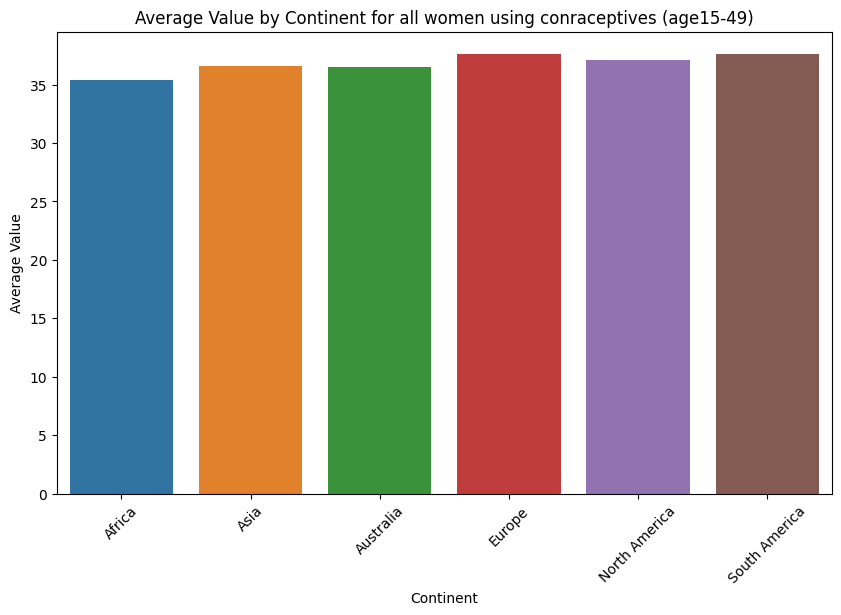

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Visualize the mean value per continent
plt.figure(figsize=(10, 6))
sns.barplot(x=allwomen_new_grouped_by_continent.index, y=allwomen_new_grouped_by_continent.values)
plt.title('Average Value by Continent for all women using conraceptives (age15-49)')
plt.xlabel('Continent')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


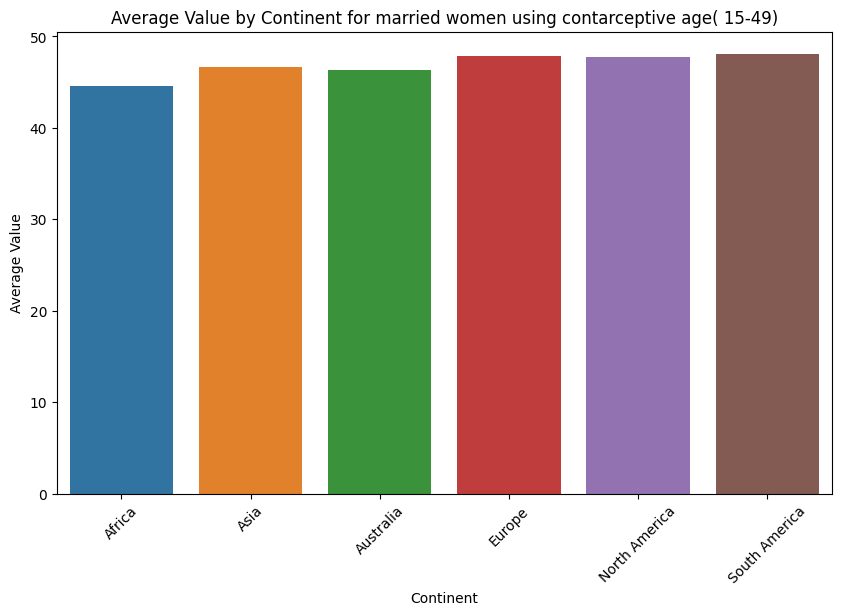

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Visualize the mean value per continent
plt.figure(figsize=(10, 6))
sns.barplot(x=married_new_grouped_by_continent.index, y=married_new_grouped_by_continent.values)
plt.title('Average Value by Continent for married women using contarceptive age( 15-49)')
plt.xlabel('Continent')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


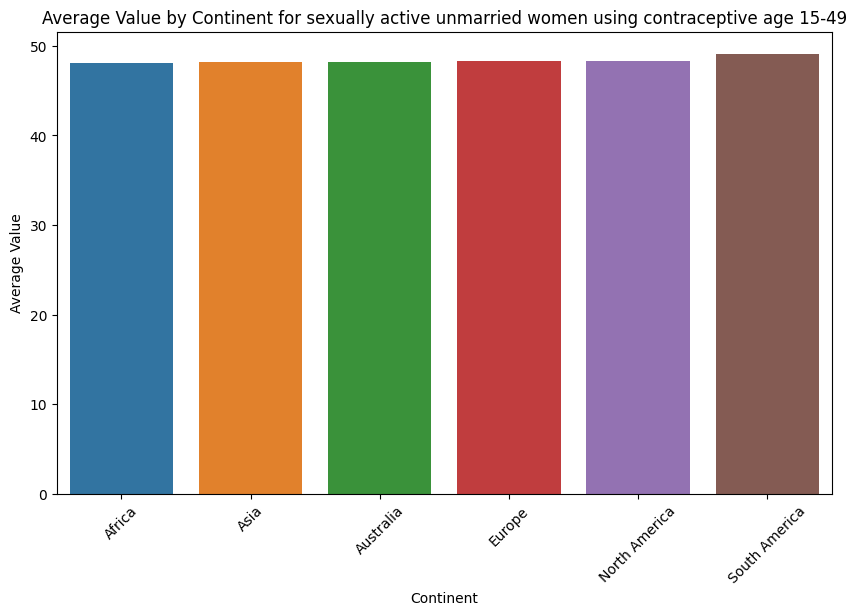

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Visualize the mean value per continent
plt.figure(figsize=(10, 6))
sns.barplot(x=unmarried_new_grouped_by_continent.index, y=unmarried_new_grouped_by_continent.values)
plt.title('Average Value by Continent for sexually active unmarried women using contraceptive age 15-49')
plt.xlabel('Continent')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


Line Chart: Trends Over Time

Purpose: Show how contraceptive usage has changed globally over time (1960-2023).

Bar Plot: Top 10 Countries with Highest & Lowest Usage

Purpose: Compare contraceptive usage across countries.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'allwomen - Distribution of Contraceptive Usage')

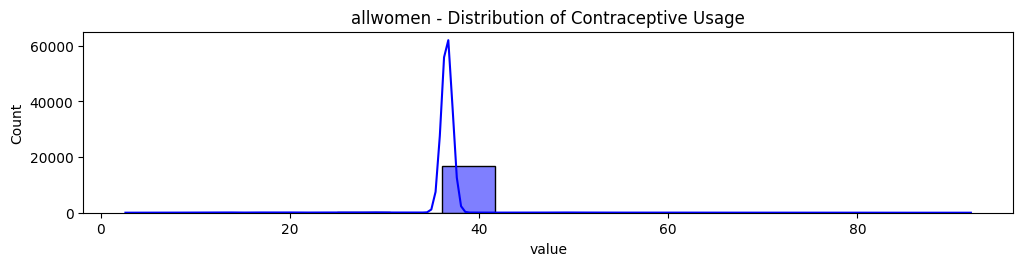

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for all three datasets
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.histplot(allwomen_new['value'], kde=True, color="blue")
plt.title("allwomen - Distribution of Contraceptive Usage")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


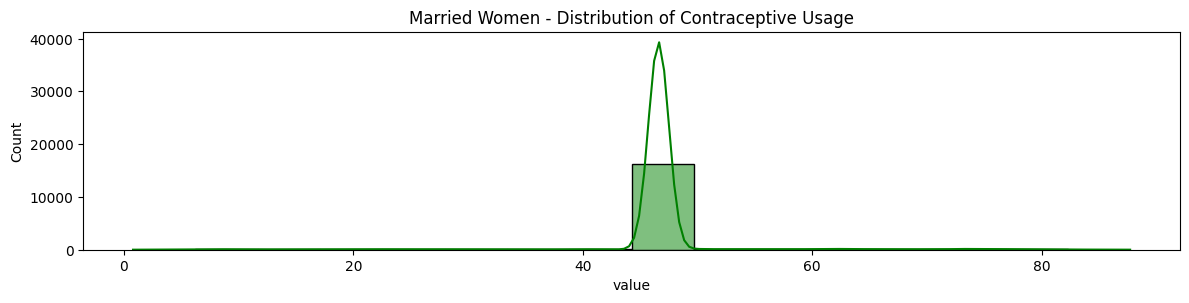

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for all three datasets
plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 2)
sns.histplot(married_new['value'], kde=True, color="green")
plt.title("Married Women - Distribution of Contraceptive Usage")


plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


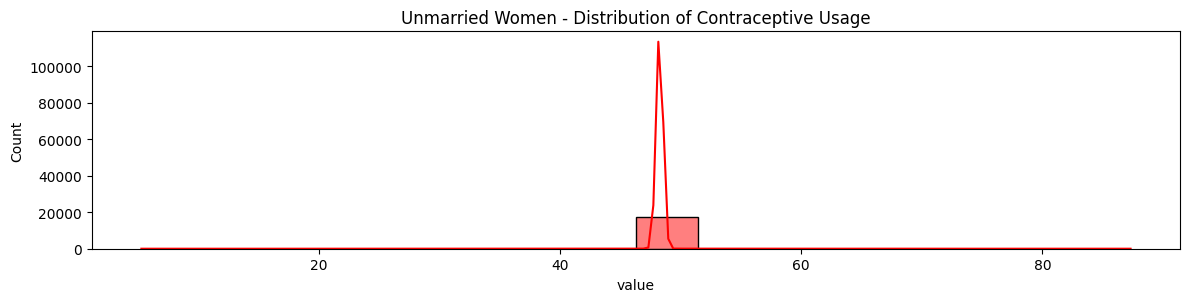

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for all three datasets
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 3)
sns.histplot(unmarried_new['value'], kde=True, color="red")
plt.title("Unmarried Women - Distribution of Contraceptive Usage")

plt.tight_layout()
plt.show()


Investigate the range of values

In [154]:
print(allwomen_new['value'].min(), allwomen['value'].max())


2.6 92.0


In [155]:
print(married_new['value'].min(), married['value'].max())


0.8 87.7


In [156]:
print(unmarried_new['value'].min(), unmarried['value'].max())


5.3 87.3


Explore the Outliers

Check for outliers that might have been smoothed out due to imputation. Use box plots to visually inspect the spread of values:

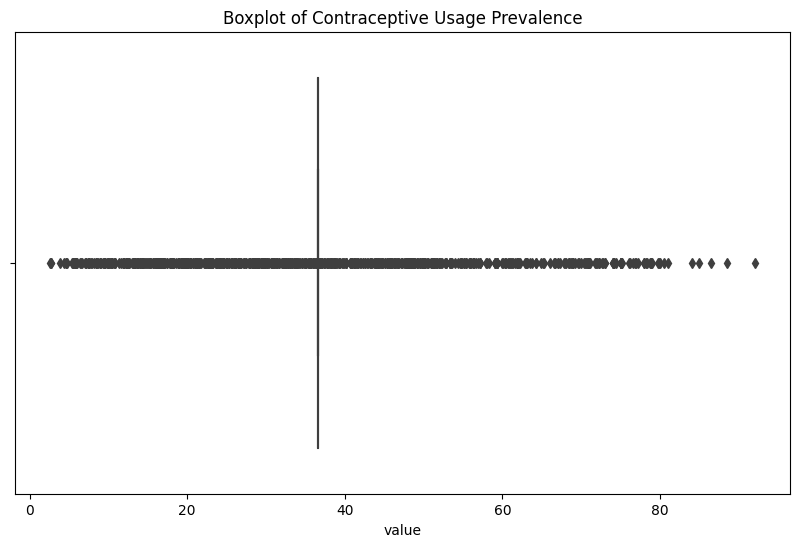

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=allwomen_new['value'])
plt.title("Boxplot of Contraceptive Usage Prevalence")
plt.show()


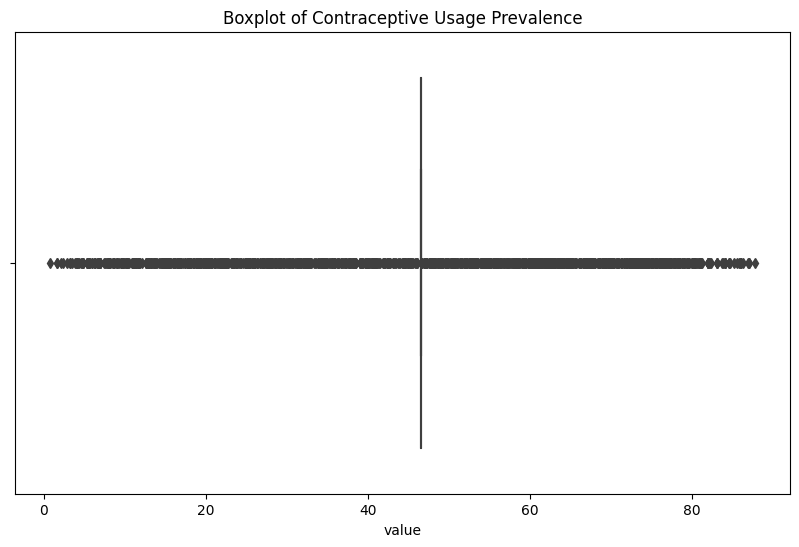

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=married_new['value'])
plt.title("Boxplot of Contraceptive Usage Prevalence")
plt.show()


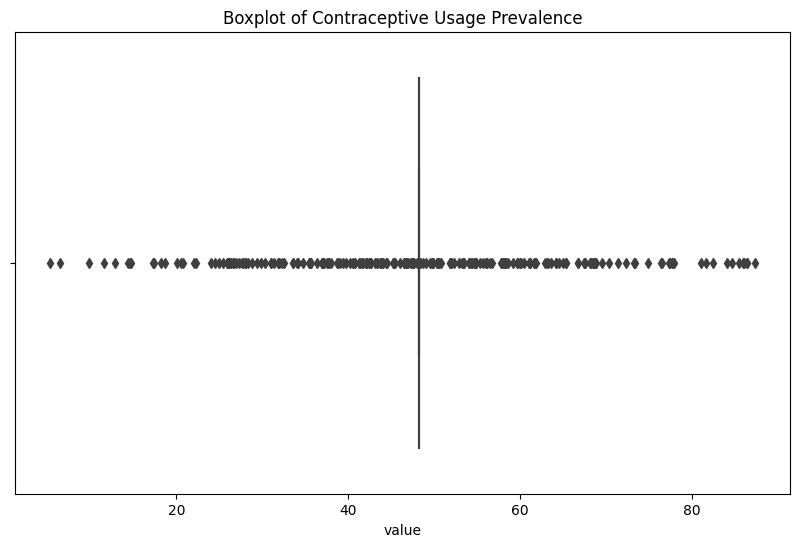

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=unmarried_new['value'])
plt.title("Boxplot of Contraceptive Usage Prevalence")
plt.show()


Check for Small Differences Between Countries

To better understand if there are real differences between countries, calculate the standard deviation of the Value column:

In [160]:
print(f"Standard Deviation of 'Value': {allwomen_new['value'].std()}")
print(f"Standard Deviation of 'Value': {married_new['value'].std()}")
print(f"Standard Deviation of 'Value': {unmarried_new['value'].std()}")




Standard Deviation of 'Value': 4.078341223979336
Standard Deviation of 'Value': 6.273161006336389
Standard Deviation of 'Value': 2.0255439844373275


In [161]:
# Check the range of values for the top 10 highest and bottom 10 lowest
print("Top 10 Highest - All women")
print(allwomen_new.nlargest(10, 'value')[['Country', 'value']])

print("\nTop 10 Highest - Married women")
print(married_new.nlargest(10, 'value')[['Country', 'value']])

print("\nTop 10 Highest - Unmarried Women")
print(unmarried_new.nlargest(10, 'value')[['Country', 'value']])

print("\nTop 10 Lowest - All Women")
print(allwomen_new.nsmallest(10, 'value')[['Country', 'value']])

print("\nTop 10 Lowest - Married Women")
print(married_new.nsmallest(10, 'value')[['Country', 'value']])

print("\nTop 10 Lowest - Unmarried Women")
print(unmarried_new.nsmallest(10, 'value')[['Country', 'value']])


Top 10 Highest - All women
               Country  value
7646           Denmark   92.0
12377           Norway   88.5
10480           Norway   86.5
12504           Canada   85.0
11581      Puerto Rico   84.1
14106          Austria   81.0
16018           Brazil   80.5
10336           Canada   80.0
15080      New Zealand   79.9
10241  Slovak Republic   79.8

Top 10 Highest - Married women
                    Country  value
11172        United Kingdom   87.7
3156                  Malta   87.0
4389                Belgium   87.0
11239                 China   86.9
13161               Czechia   86.3
8839   Hong Kong SAR, China   86.0
10204  Hong Kong SAR, China   86.0
9587               Bulgaria   85.9
9162                  Malta   85.8
15096               Finland   85.5

Top 10 Highest - Unmarried Women
        Country  value
12987   Ukraine   87.3
12659      Peru   86.4
13201      Peru   86.4
14014      Peru   86.1
13743      Peru   85.9
14285      Peru   85.5
13472      Peru   84.7
10887  C

Global prevalence

<ipython-input-162-25a88b0105d1>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-162-25a88b0105d1>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


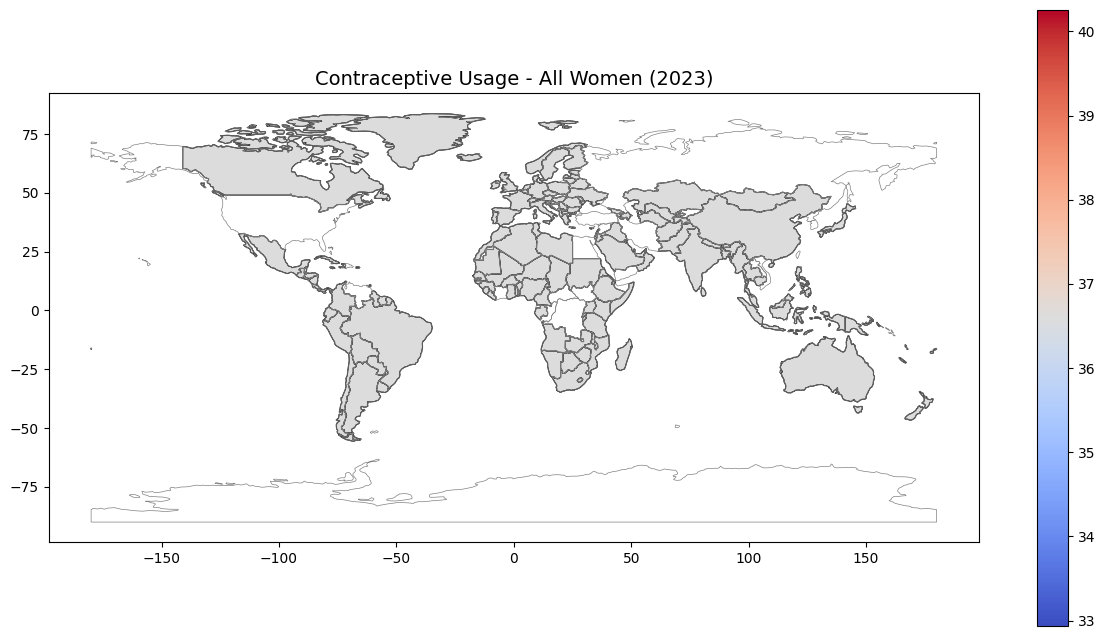

In [162]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all_2023 = allwomen_new[allwomen_new['year'] == 2023]

# Merge data with world map
world_map = world.merge(df_all_2023, left_on="name", right_on="Country", how="left")

# Define color range for better contrast
vmin = world_map['value'].quantile(0.05)  # 5th percentile to avoid extreme outliers
vmax = world_map['value'].quantile(0.95)  # 95th percentile for better scaling

# Set colormap (coolwarm: light blue to red)
cmap = cm.get_cmap('coolwarm')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Lighter boundary for clarity
world_map.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=True,
               norm=Normalize(vmin=vmin, vmax=vmax))  # Normalize data for better hue variation

plt.title("Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()


<ipython-input-163-1aaacd45d8b6>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-163-1aaacd45d8b6>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('OrRd')  # Orange-Red for better contrast


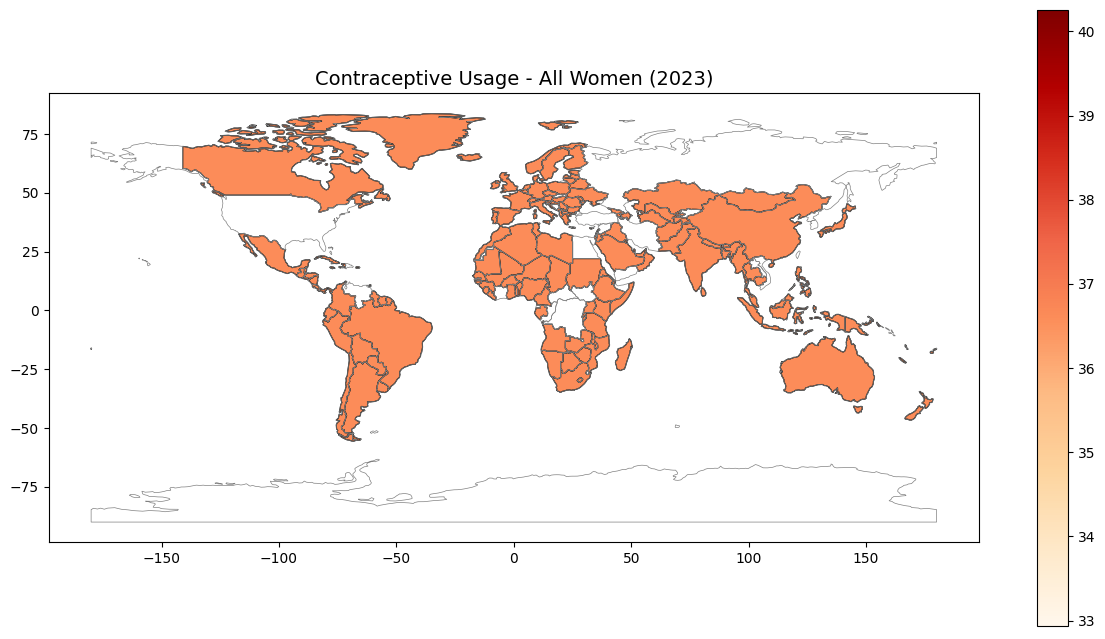

In [163]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all_2023 = allwomen_new[allwomen_new['year'] == 2023]

# Merge data with world map
world_map = world.merge(df_all_2023, left_on="name", right_on="Country", how="left")

# Define color range for better contrast
vmin = world_map['value'].quantile(0.05)  # 5th percentile to avoid extreme outliers
vmax = world_map['value'].quantile(0.95)  # 95th percentile for better scaling

# Set colormap
cmap = cm.get_cmap('OrRd')  # Orange-Red for better contrast

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Lighter boundary for clarity
world_map.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=True,
               norm=Normalize(vmin=vmin, vmax=vmax))  # Normalize data for better hue variation

plt.title("Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()


<ipython-input-164-1a3cc4a83fb0>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


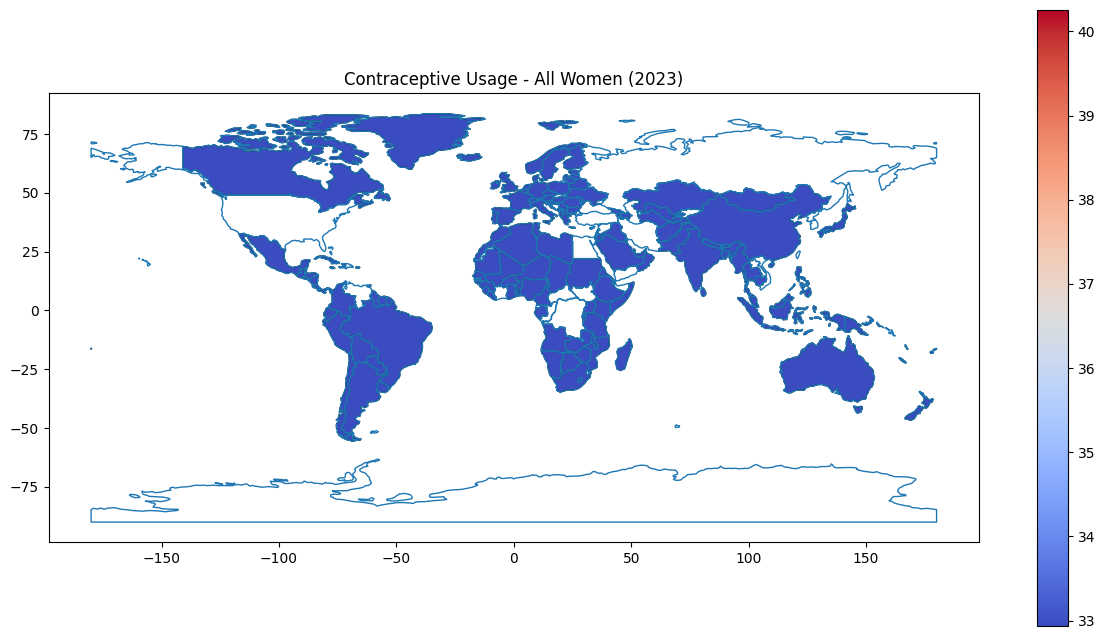

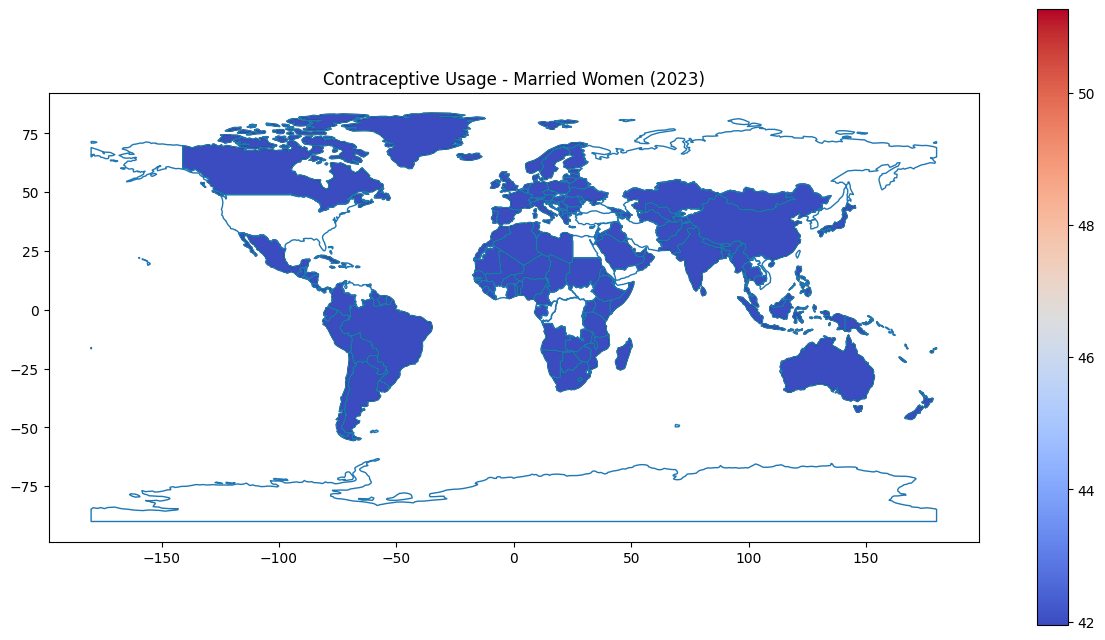

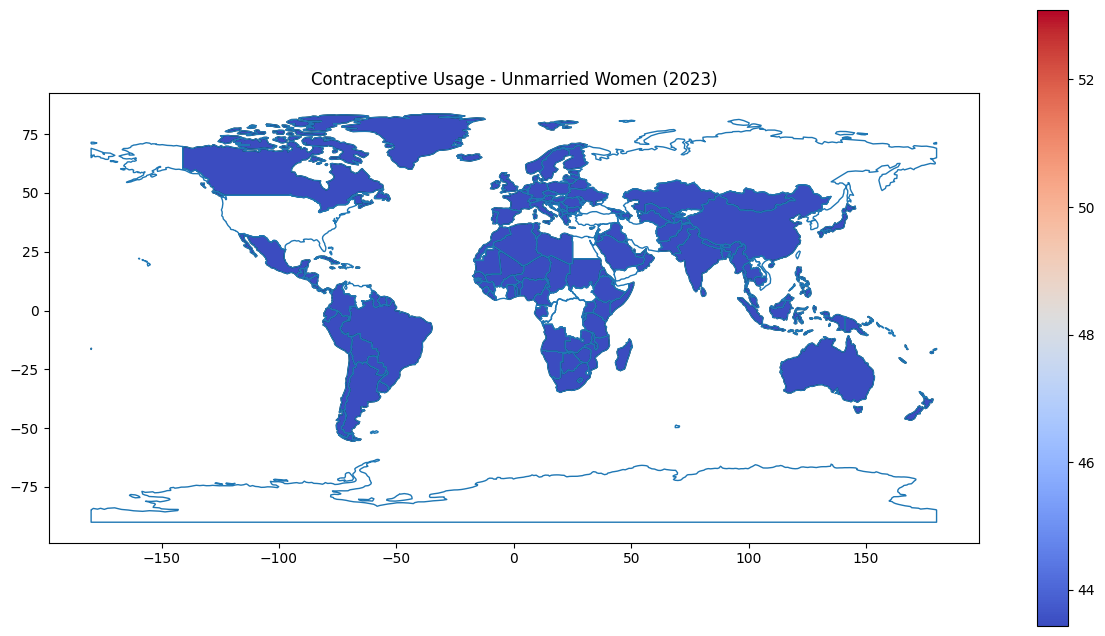

In [164]:
import geopandas as gpd

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data
df_all_2023 = allwomen_new[allwomen_new['year'] == 2023]
df_married_2023 = married_new[married_new['year'] == 2023]
df_unmarried_2023 = unmarried_new[unmarried_new['year'] == 2023]

# Function to plot world maps
def plot_choropleth(df, title):
    world_map = world.merge(df, left_on="name", right_on="Country", how="left")

    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    world.boundary.plot(ax=ax, linewidth=1)
    world_map.plot(column="value", cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor="black", legend=True)

    plt.title(title)
    plt.show()

plot_choropleth(df_all_2023, "Contraceptive Usage - All Women (2023)")
plot_choropleth(df_married_2023, "Contraceptive Usage - Married Women (2023)")
plot_choropleth(df_unmarried_2023, "Contraceptive Usage - Unmarried Women (2023)")


<ipython-input-165-0323154c365e>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-165-0323154c365e>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


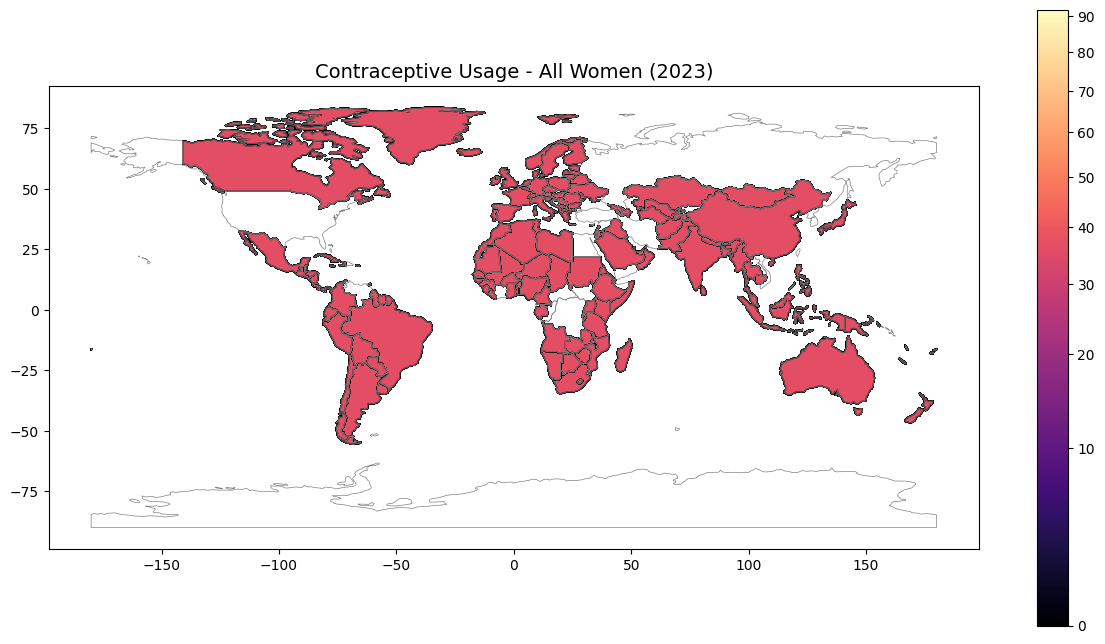

In [165]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm  # Import PowerNorm properly
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all = allwomen_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all["Country"] = df_all["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Set color range: Use percentiles but with a fallback
if not world_map['value'].isnull().all():
    vmin = world_map['value'].quantile(0.05)  # 5th percentile
    vmax = world_map['value'].quantile(0.95)  # 95th percentile
    if vmin == vmax:  # Avoid single-value issue
        vmin, vmax = world_map['value'].min(), world_map['value'].max()
else:
    vmin, vmax = 10, 80  # Default values if no data is available

# Use PowerNorm to enhance small differences
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Set colormap (magma for better contrast)
cmap = cm.get_cmap('magma')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity
world_map.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=True, norm=norm)

plt.title("Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()




<ipython-input-166-c15638c4330f>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-166-c15638c4330f>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


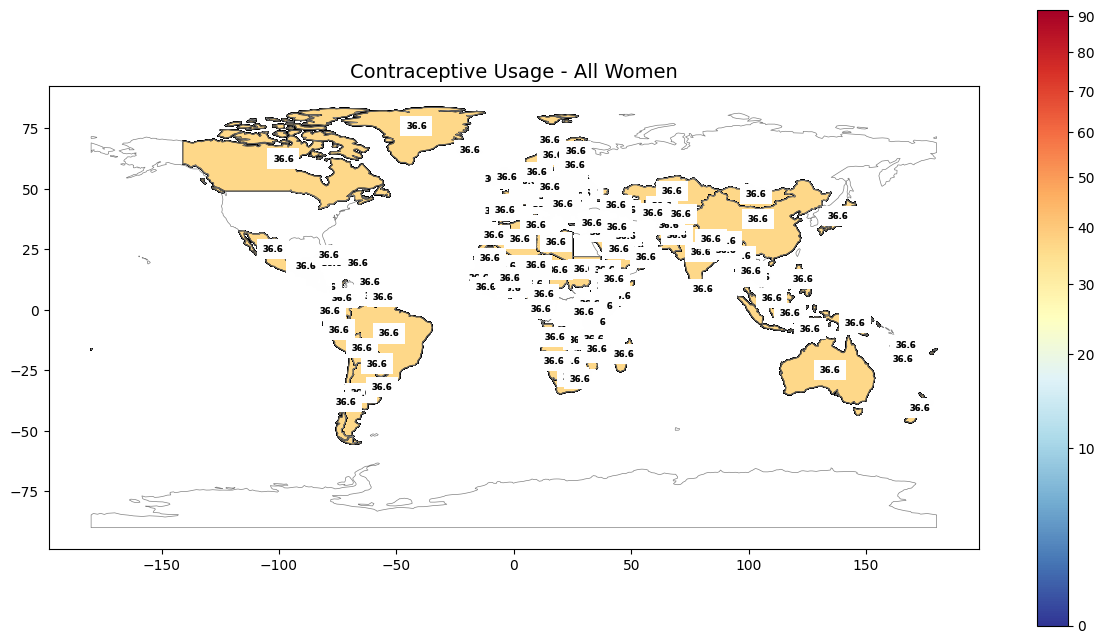

In [166]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all = allwomen_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all["Country"] = df_all["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Set color range: Use percentiles for better scaling
if not world_map['value'].isnull().all():
    vmin = world_map['value'].quantile(0.05)  # 5th percentile
    vmax = world_map['value'].quantile(0.95)  # 95th percentile
    if vmin == vmax:  # Avoid single-value issue
        vmin, vmax = world_map['value'].min(), world_map['value'].max()
else:
    vmin, vmax = 10, 80  # Default range for contrast

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity
world_map.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=True, norm=norm)

# Add country labels with values
for idx, row in world_map.iterrows():
    if not np.isnan(row["value"]):  # Only label valid data points
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
                fontsize=6, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title("Contraceptive Usage - All Women", fontsize=14)
plt.show()


<ipython-input-167-b760a3eb87a2>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-167-b760a3eb87a2>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


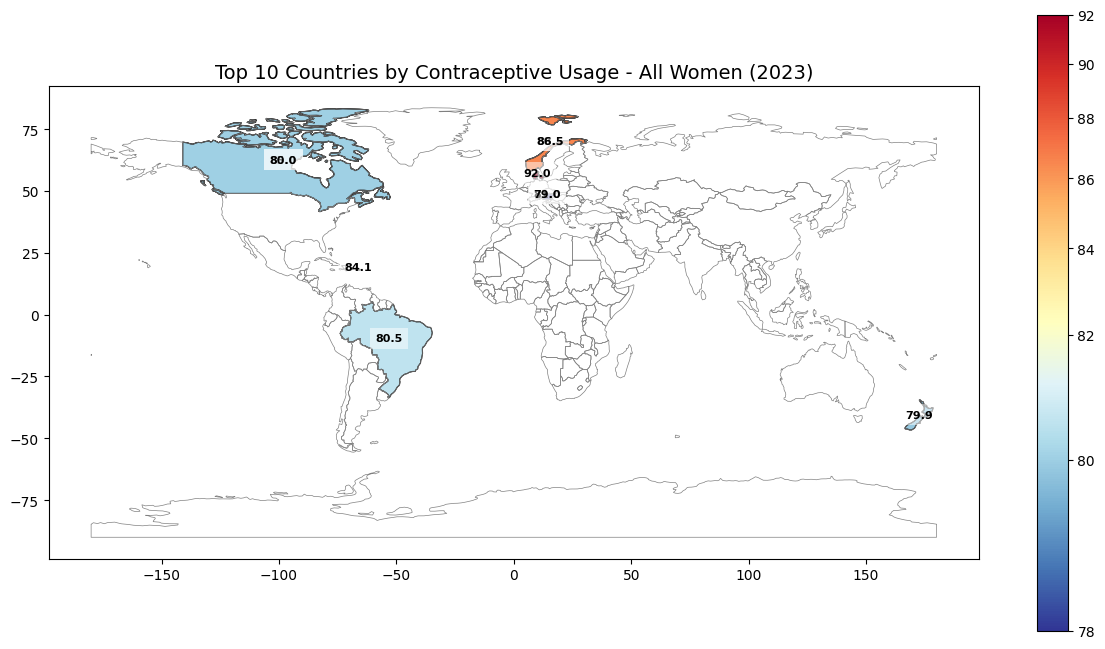

In [167]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all_2023 = allwomen_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all_2023["Country"] = df_all_2023["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all_2023, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 countries
top_10_countries = world_map.nlargest(10, 'value')

# Set color range for better scaling
vmin = top_10_countries['value'].min()
vmax = top_10_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 countries
top_10_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=True, norm=norm)

# Add country labels with values
for idx, row in top_10_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title("Top 10 Countries by Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()


<ipython-input-168-e4cd8a16ee5b>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-168-e4cd8a16ee5b>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


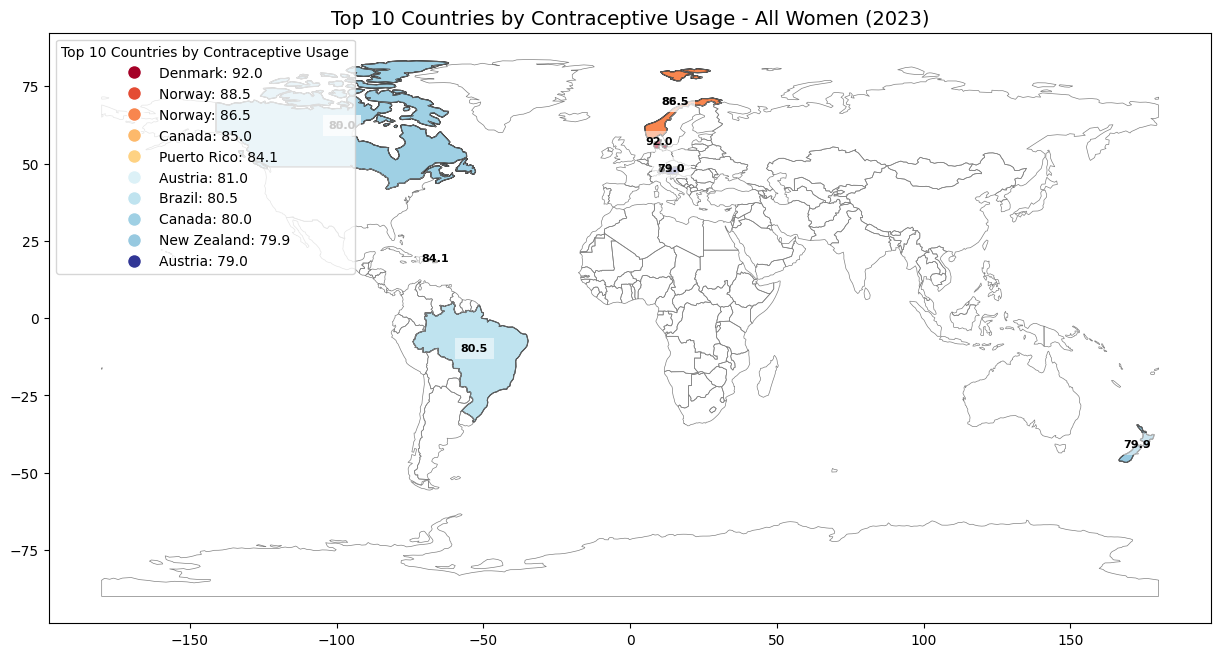

In [168]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all_2023 = allwomen_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all_2023["Country"] = df_all_2023["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all_2023, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 countries
top_10_countries = world_map.nlargest(10, 'value')

# Set color range for better scaling
vmin = top_10_countries['value'].min()
vmax = top_10_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 countries
top_10_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=False, norm=norm)

# Add country labels with values
for idx, row in top_10_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Create a custom legend with country names and their values
handles = []
labels = []
for idx, row in top_10_countries.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(row['value'])), markersize=10))
    labels.append(f"{row['name']}: {row['value']:.1f}")

# Add the custom legend to the plot
ax.legend(handles, labels, title="Top 10 Countries by Contraceptive Usage", loc='upper left', fontsize=10)

plt.title("Top 10 Countries by Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()


<ipython-input-169-3239308f94b5>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-169-3239308f94b5>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


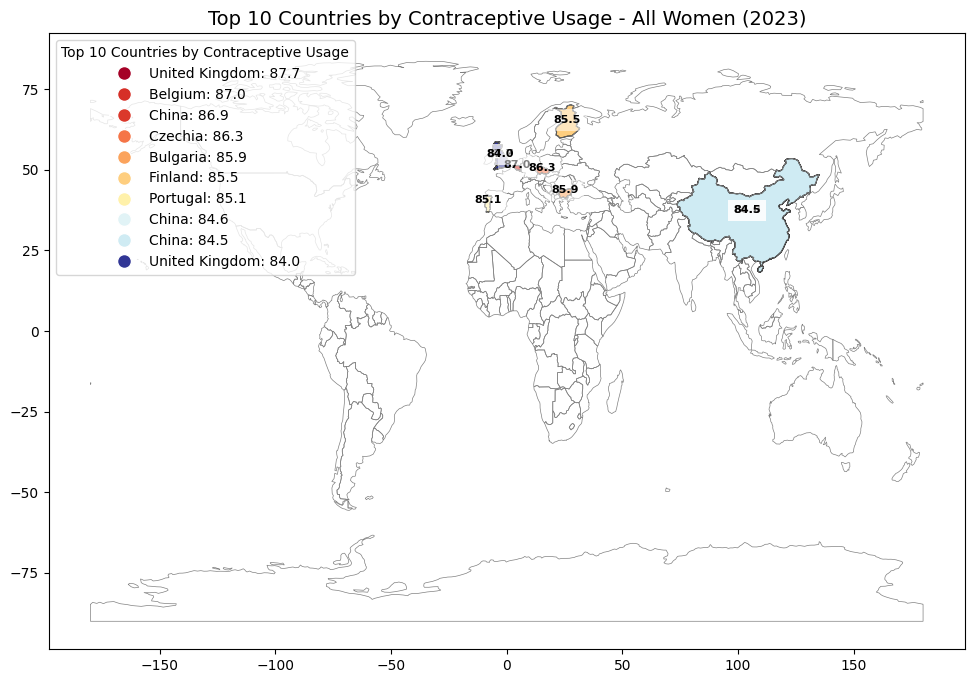

In [169]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all = married_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all["Country"] = df_all["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 countries
top_10_countries = world_map.nlargest(10, 'value')

# Set color range for better scaling
vmin = top_10_countries['value'].min()
vmax = top_10_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 countries
top_10_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=False, norm=norm)

# Add country labels with values
for idx, row in top_10_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Create a custom legend with country names and their values
handles = []
labels = []
for idx, row in top_10_countries.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(row['value'])), markersize=10))
    labels.append(f"{row['name']}: {row['value']:.1f}")

# Add the custom legend to the plot
ax.legend(handles, labels, title="Top 10 Countries by Contraceptive Usage", loc='upper left', fontsize=10)

plt.title("Top 10 Countries by Contraceptive Usage - All Women (2023)", fontsize=14)
plt.show()


<ipython-input-170-566096e907bc>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-170-566096e907bc>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


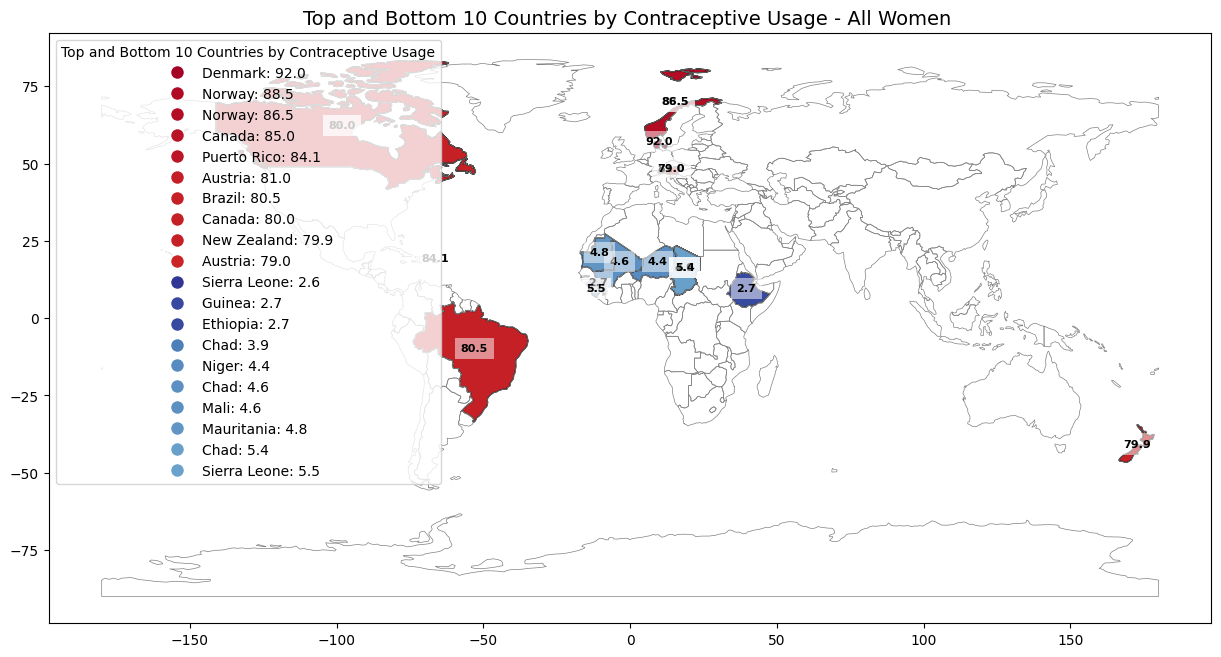

In [170]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all_2023 = allwomen_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all_2023["Country"] = df_all_2023["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all_2023, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 and bottom 10 countries
top_10_countries = world_map.nlargest(10, 'value')
bottom_10_countries = world_map.nsmallest(10, 'value')

# Combine both top 10 and bottom 10 for visualization
combined_countries = pd.concat([top_10_countries, bottom_10_countries])

# Set color range for better scaling
vmin = combined_countries['value'].min()
vmax = combined_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 and bottom 10 countries
combined_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=False, norm=norm)

# Add country labels with values
for idx, row in combined_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Create a custom legend with country names and their values
handles = []
labels = []
for idx, row in combined_countries.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(row['value'])), markersize=10))
    labels.append(f"{row['name']}: {row['value']:.1f}")

# Add the custom legend to the plot
ax.legend(handles, labels, title="Top and Bottom 10 Countries by Contraceptive Usage", loc='upper left', fontsize=10)

plt.title("Top and Bottom 10 Countries by Contraceptive Usage - All Women ", fontsize=14)
plt.show()


<ipython-input-171-8664d4c3b2de>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-171-8664d4c3b2de>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


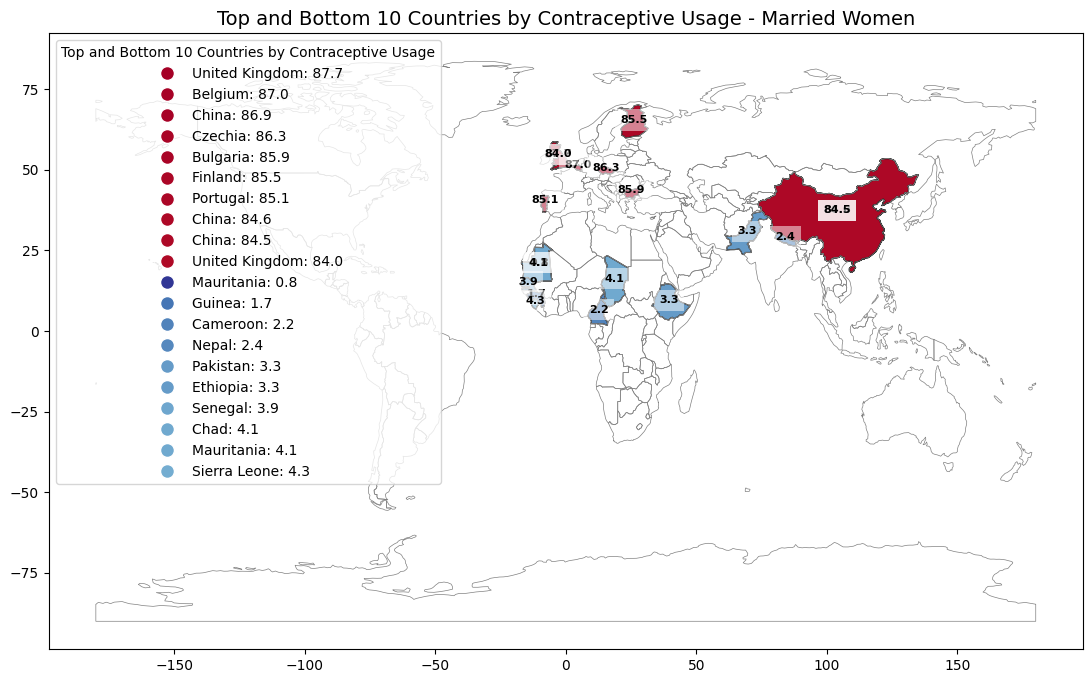

In [171]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get 2023 data (assuming 'allwomen' is your DataFrame)
df_all = married_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df_all["Country"] = df_all["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df_all, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 and bottom 10 countries
top_10_countries = world_map.nlargest(10, 'value')
bottom_10_countries = world_map.nsmallest(10, 'value')

# Combine both top 10 and bottom 10 for visualization
combined_countries = pd.concat([top_10_countries, bottom_10_countries])

# Set color range for better scaling
vmin = combined_countries['value'].min()
vmax = combined_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 and bottom 10 countries
combined_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=False, norm=norm)

# Add country labels with values
for idx, row in combined_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Create a custom legend with country names and their values
handles = []
labels = []
for idx, row in combined_countries.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(row['value'])), markersize=10))
    labels.append(f"{row['name']}: {row['value']:.1f}")

# Add the custom legend to the plot
ax.legend(handles, labels, title="Top and Bottom 10 Countries by Contraceptive Usage", loc='upper left', fontsize=10)

plt.title("Top and Bottom 10 Countries by Contraceptive Usage - Married Women", fontsize=14)
plt.show()


<ipython-input-172-88138bcdcac6>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-172-88138bcdcac6>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlBu_r')


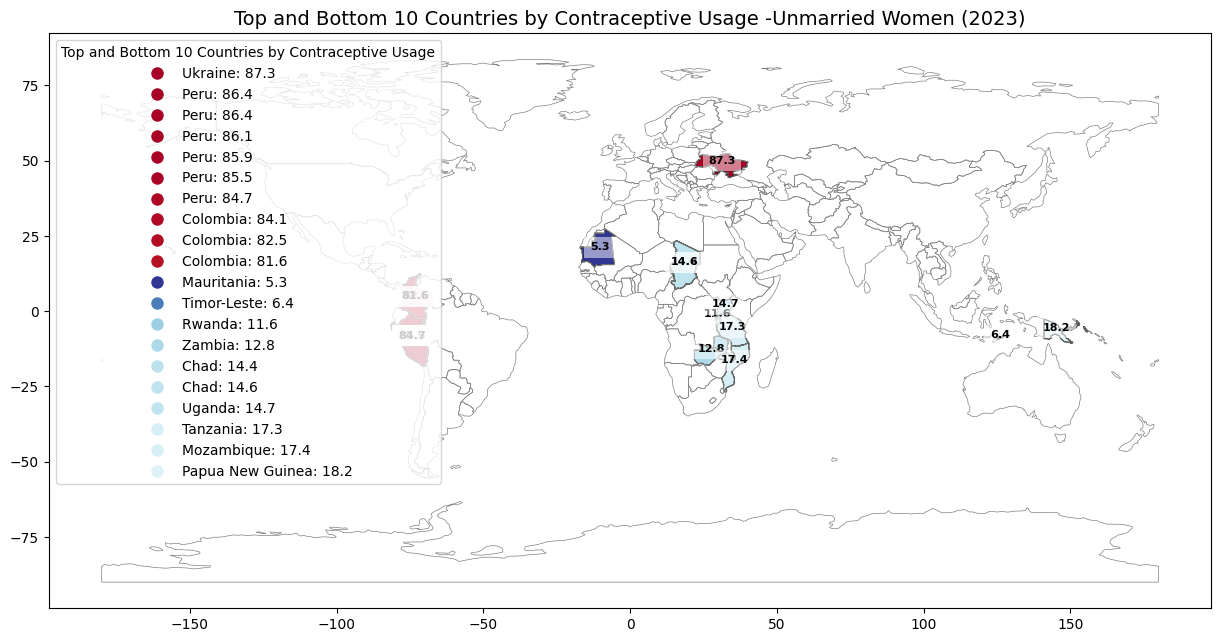

In [172]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.cm as cm

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get  data (assuming 'allwomen' is your DataFrame)
df = unmarried_new.copy()  # Ensure it's a copy

# Check for mismatched country names and adjust if needed
df["Country"] = df["Country"].str.strip()  # Remove extra spaces

# Merge data with world map
world_map = world.merge(df, left_on="name", right_on="Country", how="left")

# Drop rows where 'value' is missing
world_map = world_map.dropna(subset=['value'])

# Sort by contraceptive usage and get top 10 and bottom 10 countries
top_10_countries = world_map.nlargest(10, 'value')
bottom_10_countries = world_map.nsmallest(10, 'value')

# Combine both top 10 and bottom 10 for visualization
combined_countries = pd.concat([top_10_countries, bottom_10_countries])

# Set color range for better scaling
vmin = combined_countries['value'].min()
vmax = combined_countries['value'].max()

# Use PowerNorm for enhanced contrast
norm = PowerNorm(gamma=0.5, vmin=vmin, vmax=vmax)

# Use a colormap with better contrast
cmap = cm.get_cmap('RdYlBu_r')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')  # Light gray for clarity

# Plot only top 10 and bottom 10 countries
combined_countries.plot(column="value", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="black", legend=False, norm=norm)

# Add country labels with values
for idx, row in combined_countries.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['value']:.1f}", 
            fontsize=8, ha='center', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Create a custom legend with country names and their values
handles = []
labels = []
for idx, row in combined_countries.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(row['value'])), markersize=10))
    labels.append(f"{row['name']}: {row['value']:.1f}")

# Add the custom legend to the plot
ax.legend(handles, labels, title="Top and Bottom 10 Countries by Contraceptive Usage", loc='upper left', fontsize=10)

plt.title("Top and Bottom 10 Countries by Contraceptive Usage -Unmarried Women (2023)", fontsize=14)
plt.show()


In [173]:
afghanistan_value = df_all_2023[df_all_2023['Country'] == 'Afghanistan']
print(afghanistan_value[['Country', 'value']])


           Country     value
0      Afghanistan  36.59596
271    Afghanistan  36.59596
542    Afghanistan  36.59596
813    Afghanistan  36.59596
1084   Afghanistan  36.59596
...            ...       ...
15989  Afghanistan  36.59596
16260  Afghanistan  36.59596
16531  Afghanistan  36.59596
16802  Afghanistan  36.59596
17073  Afghanistan  36.59596

[64 rows x 2 columns]
